In [1]:
# compartments
import box_lake 
import box_soil
import box_vegetation
import box_herbivores
import box_terrestrial
# additional
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# -1- Initialize the pools!

In [2]:
# <1> Geometrical:
# <1.1> Convert from km2 to m2
km2_to_m2 = 1000000
# <1.2> Total catchment area:
area_catchment = 1.56 * km2_to_m2 
# <1.3> Terrestrial area:
area_terr = 1.18 * km2_to_m2 
# <1.4> Different terrestrial features [%]:
area_bedrock = 7
area_non_veg = 15
area_betula = 14
area_grass = 20
area_meadow = 38
area_wetland = 7
# <1.5> Aquatic area:
area_lake = 0.38 * km2_to_m2
# <1.6> Different aquatic features:
area_lake_above16 = 0.22 * km2_to_m2
area_lake_below16 = 0.16 * km2_to_m2
# <1.7> Aquatic volume [m3]:
volume_lake = 4250000 
# <1.8> Different volume features:
volume_above14 = 3178000
volume_below14 = 1072000
# <1.9> Aquatic depth [m]:
depth_max_lake = 29.9
depth_mean_lake = 11.3

# <2> Biophysical parameterization:
# <2.1> Root to shoot ratio:
root_shoot_betula = 2
root_shoot_grass = 6
root_shoot_meadow = 6
root_shoot_wetland = 6
# <2.4> Green AGB [kg C / m2]:
green_betula = 0.072
green_grass = 0.051
green_meadow = 0.044
green_wetland = 0.018
# <2.5> Bryophyte AGB [kg C / m2]:
bryo_betula = 0.0833  # old = 0.157; old2 = 0.0715
bryo_grass = 0
bryo_meadow = 0.0134
bryo_wetland = 0.091
# <2.6> Litter AGB [kg C / m2]:
agb_litter_betula = 0.931
agb_litter_grass = 0.285
agb_litter_meadow = 0.495
agb_litter_wetland = 0.576
# <2.7> Wood AGB [kg C / m2]:
wood_betula = 0.786
wood_grass = 0
wood_meadow = 0
wood_wetland = 0.039
# <2.8> Roots [kg C / m2]:
roots_betula = 2.230
roots_grass = 0.950
roots_meadow = 1.520
roots_wetland = 1.090
# <2.9> Benthic organisms [kg C / m2]:
# <2.9.1> Macrophytes:
benthic_macrophytes = 0.0878
# <2.9.2> Macro Fauna:
benthic_macrofauna = 0.000324
# <2.9.3> Bacteria:
benthic_bacteria = 0.000883
# <2.10> Aquatic organisms [kg C / m3]:
# <2.10.1> Phytoplankton:
phytoplankton = 0.0000289
# <2.10.2> Zooplankton:
zooplankton = 0.0000412
# <2.10.3> Bacterioplankton:
bacterioplankton = 0.0000143
# <2.11> Water dissolved carbon [kg C / m3]:
# <2.11.1> Inorganic carbon:
lake_water_IC = 0.0169
# <2.11.2> Organic carbon:
lake_water_OC = 0.00861
# <2.12> Lake sediment carbon [kg C / m2]:
lake_sediment = 10
# <2.13> Herbivore mass [kg C / m2]
herbivore_mass = 0.000872

# <3> Geochemical parameterization:
# <3.1> SOC active layer:
soc_active_bedrock = 0
soc_active_non_veg = 7.05
soc_active_betula = 22.1
soc_active_grass = 10.3
soc_active_meadow = 13.3
soc_active_wetland = 18.5
# <3.2> SOC permafrost layer:
soc_permafrost_bedrock = 0
soc_permafrost_non_veg = 2.85
soc_permafrost_betula = 11.7
soc_permafrost_grass = 2.8
soc_permafrost_meadow = 10.1
soc_permafrost_wetland = 17.7


In [3]:
# <1> Create the pools:
# <1.1> Soil:
soil = box_soil.Soil(area_terr, area_bedrock, area_non_veg, area_betula, area_grass, area_meadow, area_wetland,
0, 0, roots_betula, roots_grass, roots_meadow, roots_wetland, soc_active_bedrock, soc_active_non_veg, soc_active_betula,
soc_active_grass, soc_active_meadow, soc_active_wetland, soc_permafrost_bedrock, soc_permafrost_non_veg, 
soc_permafrost_betula, soc_permafrost_grass, soc_permafrost_meadow, soc_permafrost_wetland)
# <1.2> Vegetation:
vegetation = box_vegetation.Vegetation(area_terr, area_bedrock, area_non_veg, 
area_betula, area_grass, area_meadow, area_wetland, root_shoot_betula, root_shoot_grass, 
root_shoot_meadow, root_shoot_wetland, green_betula, green_grass, green_meadow, green_wetland, 
bryo_betula, bryo_grass, bryo_meadow, bryo_wetland, roots_betula, roots_grass, roots_meadow, 
roots_wetland, wood_betula, wood_grass, wood_meadow, wood_wetland, agb_litter_betula, agb_litter_grass,
agb_litter_meadow, agb_litter_wetland)
# <1.3> Lake:
lake = box_lake.Lake(area_lake, volume_lake, benthic_macrophytes, benthic_macrofauna, benthic_bacteria, 
phytoplankton, zooplankton, bacterioplankton, lake_water_IC, lake_water_OC, lake_sediment)
# <1.4> Herbivores:
herbivore = box_herbivores.Herbivores(area_terr,  herbivore_mass)

In [4]:
print('Soil active layer carbon =', (soil.soc_active_total / 10000000), '[kg C / m2].')
print('Soil permafrost layer carbon=', (soil.soc_permafrost_total / 1000000), '[kg C / m2].')
print('Vegetation carbon=', (vegetation.total_biomass / 100000), '[kg C / m2].')
print('Herbivore carbon=', (herbivore.total_biomass / 1000), '[kg C / m2].')
print('Lake carbon=', (lake.total_carbon / 1000000), '[kg C / m2].')

Soil active layer carbon = 1.482139 [kg C / m2].
Soil permafrost layer carbon= 9.08895 [kg C / m2].
Vegetation carbon= 8.16501 [kg C / m2].
Herbivore carbon= 1.02896 [kg C / m2].
Lake carbon= 3.94259886 [kg C / m2].


In [5]:
print('biomass_benthic_macrophyte =', (lake.biomass_benthic_macrophyte / 10000))
print('biomass_benthic_macrofauna', (lake.biomass_benthic_macrofauna / 100))
print('biomass_benthic_bacteria', (lake.biomass_benthic_bacteria / 100))
print('biomass_phytoplankton', (lake.biomass_phytoplankton / 100))
print('biomass_zooplankton', (lake.biomass_zooplankton / 100))
print('biomass_bacterioplankton', (lake.biomass_bacterioplankton / 10))
print('total_IC', (lake.total_IC / 10000))
print('total_OC', (lake.total_OC / 10000))
print('carbon_sediment', (lake.carbon_sediment / 1000000))

biomass_benthic_macrophyte = 3.3364
biomass_benthic_macrofauna 1.2312
biomass_benthic_bacteria 3.3554000000000004
biomass_phytoplankton 1.22825
biomass_zooplankton 1.751
biomass_bacterioplankton 6.0775
total_IC 7.1825
total_OC 3.65925
carbon_sediment 3.8


In [6]:
# <2> Define the fluxes:
# <2.1> Vegetation
# <2.1.1> Productivity vascular tissue:
prod_vasc_betula = 1
prod_vasc_grass = 3
prod_vasc_meadow = 3
prod_vasc_wetland = 2
# <2.1.2> Productivity bryophytes:
prod_bryo_betula = 0.3
prod_bryo_grass = 0.3
prod_bryo_meadow = 0.3
prod_bryo_wetland = 0.3
# <2.1.3> Flux of NPP to SOC layer [kg C / m2 a]:
veg_to_soil = 0.138 
# <2.1.4> Set vegetation fluxes:
vegetation.set_fluxes(prod_vasc_betula, prod_vasc_grass, prod_vasc_meadow,
prod_vasc_wetland, prod_bryo_betula, prod_bryo_grass, prod_bryo_meadow, prod_bryo_wetland, veg_to_soil)

# <2.2> Soil
# <2.2.1> Input:
soil_accumulation = veg_to_soil
# <2.2.2> Respiration:
soil_respiration = 0.13
# <2.2.3> Export to Permafrost:
active_layer_2_permafrost = 0.00294
# <2.2.4> Export to Lake:
active_layer_OC_2_lake = 0.00136 + 0.00126 # non-spring + spring
active_layer_IC_2_lake = 0.00827
# <2.2.5> Set soil fluxes:
soil.set_fluxes(soil_respiration, soil_accumulation, active_layer_2_permafrost, active_layer_IC_2_lake, active_layer_OC_2_lake) 

# <2.3> Herbivores:
# <2.3.1> Input / output:
grazing = 0.00884
# <2.3.2> Set herbivore fluxes:
herbivore.set_fluxes(grazing)

# <2.4> Lake:
# <2.4.1> Input:
benthic_npp = 0.00389
pelagic_gpp = 0.00274
lake_water_IC_in = active_layer_IC_2_lake
lake_water_OC_in = active_layer_OC_2_lake
# <2.4.2> Eolian deposition:
lake_deposition = 0.00199
# <2.4.3> Respiration:
benthic_respiration = 0.00364
pelagic_resp_auto = 0.000997
pelagic_resp_hetero = 0.000572 # lake Rh summer
lake_resp_hetero = 0.000477 # lake Rh winter
# <2.4.4> Sediment incorporation:
sediment_accumulation = 0.00257
# <2.4.5> Export via runoff:
lake_water_IC_out = 0.0000574
lake_water_OC_out = 0.0000293
# <2.4.6> Export to atmosphere:
lake_emission = 0.00379
# <2.4.6> Set lake fluxes:
lake.set_fluxes(benthic_npp, benthic_respiration, pelagic_gpp, pelagic_resp_auto, pelagic_resp_hetero, lake_resp_hetero, sediment_accumulation, lake_emission, lake_deposition, lake_water_IC_out, lake_water_OC_out, lake_water_IC_in, lake_water_OC_in)

In [9]:
print('Green =', [x * 1000 for x in [vegetation.green_betula, vegetation.green_grass, vegetation.green_meadow, vegetation.green_wetland]])
print('Bryo =', [x * 1000 for x in [vegetation.bryo_betula, vegetation.bryo_grass, vegetation.bryo_meadow, vegetation.bryo_wetland]])
print('NPP =', [x * 1000 for x in [vegetation.npp_betula, vegetation.npp_grass, vegetation.npp_meadow, vegetation.npp_wetland]])
print('NPP =', vegetation.total_npp)

Green = [72.0, 51.0, 44.0, 18.0]
Bryo = [83.3, 0, 13.4, 91.0]
NPP = [168.98999999999998, 204.0, 180.02, 81.29999999999998]
NPP = 163497.49599999998


In [10]:
# <3> Let the model run for n timesteps:
# <3.1> Book keeping the pool states:
pool_soil_active = []
pool_soil_permafrost = []
pool_vegetation = []
pool_herbivore = []
pool_lake = []
pool_iterations = []
# <3.2> Add initial values:
pool_iterations.append(0)
pool_soil_active.append(soil.soc_active_total)
pool_soil_permafrost.append(soil.soc_permafrost_total)
pool_vegetation.append(vegetation.total_biomass)
pool_herbivore.append(herbivore.total_biomass)
pool_lake.append(lake.total_carbon)
# <3.3> Run:
for i in range(1, 101):
    # Vegetation:
    vegetation.import_to_veg()
    vegetation.export_to_soil()
    print('NPP =', vegetation.total_npp)
    print('2soil =', vegetation.total_veg_to_soil)
    # Soil:
    soil.do_active_layer_accumulation()
    soil.do_respiration()
    soil.do_permafrost_layer_accumulation()
    soil.do_active_layer_IC_erosion()
    soil.do_active_layer_OC_erosion()
    # Herbivores:
    herbivore.do_grazing()
    herbivore.burn_calories()
    # Lake:
    lake.import_OC()
    lake.import_IC()
    lake.lake_to_atmo()
    lake.atmo_to_lake()
    lake.export_IC_downstream()
    lake.export_OC_downstream()
    lake.lake_production()
    lake.sediment_incorporation()
    lake.update_total_carbon()
    # Pools:
    pool_iterations.append(i)
    pool_soil_active.append(soil.soc_active_total)
    pool_soil_permafrost.append(soil.soc_permafrost_total)
    pool_vegetation.append(vegetation.total_biomass)
    pool_herbivore.append(herbivore.total_biomass)
    pool_lake.append(lake.total_carbon)

pool_df = pd.DataFrame({'Iteration':pool_iterations, 'Soil Active Carbon':pool_soil_active, 'Soil Permafrost Carbon':pool_soil_permafrost, 'Vegetation Carbon':pool_vegetation, 'Herbivore Carbon':pool_herbivore, 'Lake Carbon':pool_lake})

NPP = 163497.49599999998
2soil = 162840.0
NPP = 163497.49599999998
2soil = 162840.0
NPP = 163497.49599999998
2soil = 162840.0
NPP = 163497.49599999998
2soil = 162840.0
NPP = 163497.49599999998
2soil = 162840.0
NPP = 163497.49599999998
2soil = 162840.0
NPP = 163497.49599999998
2soil = 162840.0
NPP = 163497.49599999998
2soil = 162840.0
NPP = 163497.49599999998
2soil = 162840.0
NPP = 163497.49599999998
2soil = 162840.0
NPP = 163497.49599999998
2soil = 162840.0
NPP = 163497.49599999998
2soil = 162840.0
NPP = 163497.49599999998
2soil = 162840.0
NPP = 163497.49599999998
2soil = 162840.0
NPP = 163497.49599999998
2soil = 162840.0
NPP = 163497.49599999998
2soil = 162840.0
NPP = 163497.49599999998
2soil = 162840.0
NPP = 163497.49599999998
2soil = 162840.0
NPP = 163497.49599999998
2soil = 162840.0
NPP = 163497.49599999998
2soil = 162840.0
NPP = 163497.49599999998
2soil = 162840.0
NPP = 163497.49599999998
2soil = 162840.0
NPP = 163497.49599999998
2soil = 162840.0
NPP = 163497.49599999998
2soil = 1

In [ ]:
pool_df

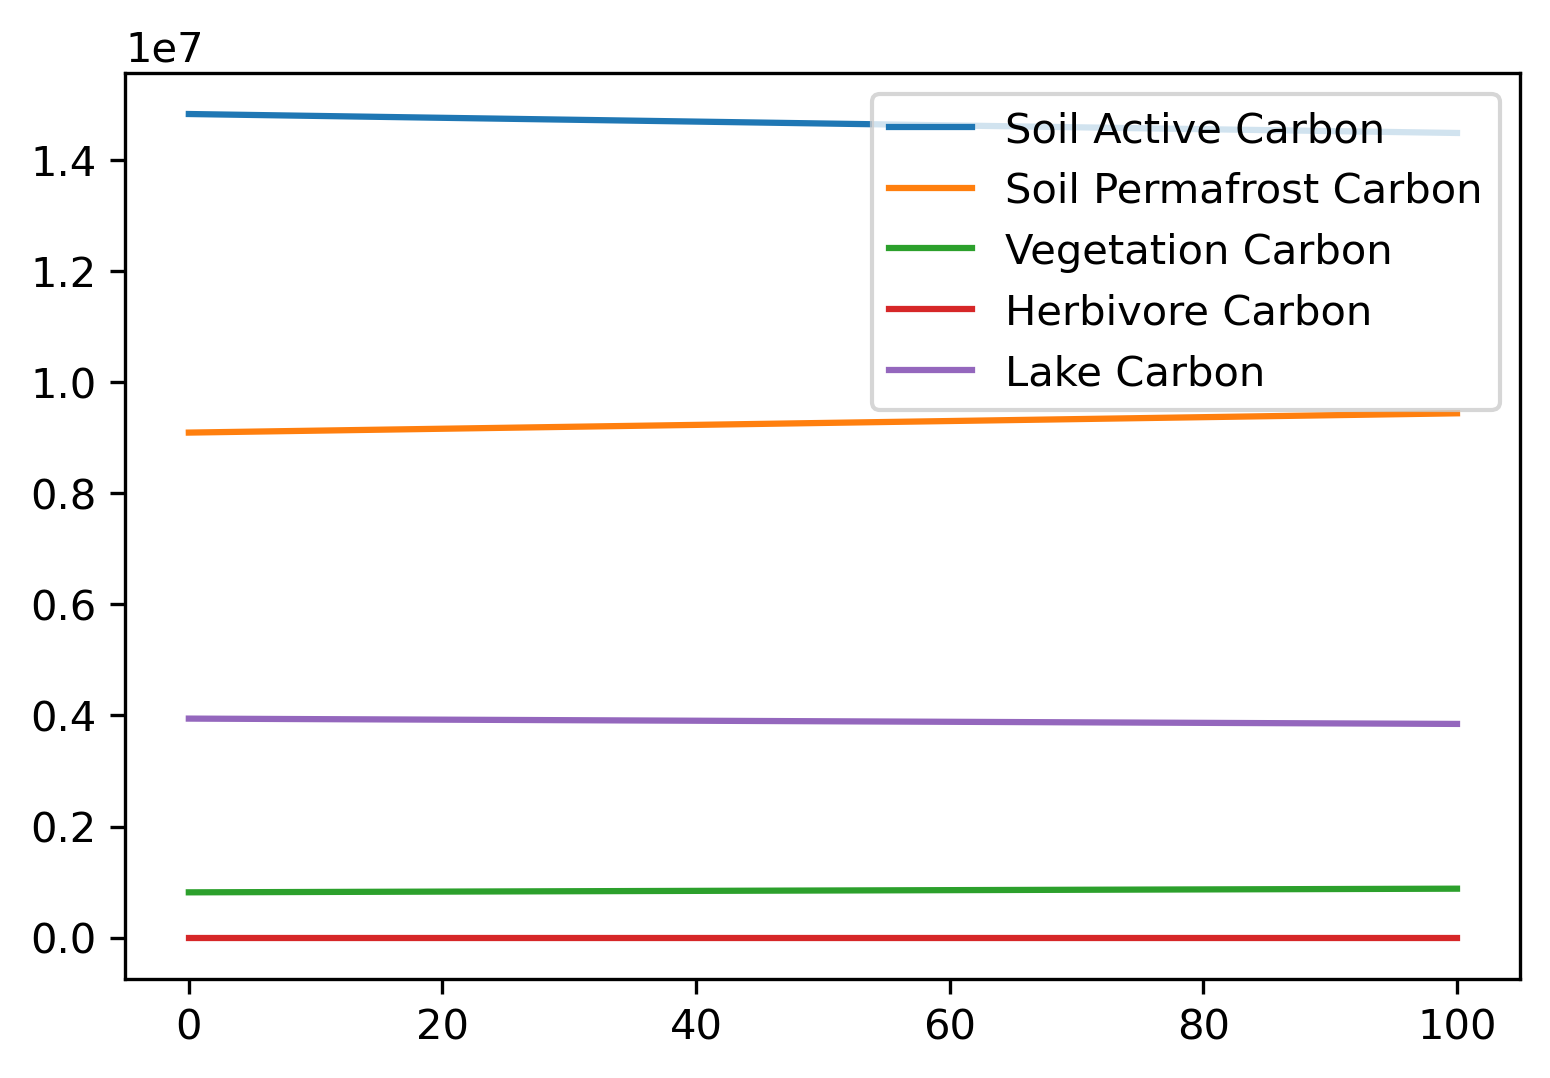

In [13]:
fig = plt.figure(dpi=300)
pool_df['Soil Active Carbon'].plot()
pool_df['Soil Permafrost Carbon'].plot()
pool_df['Vegetation Carbon'].plot()
pool_df['Herbivore Carbon'].plot()
pool_df['Lake Carbon'].plot()
plt.legend()

In [ ]:
# test
print('Vegetation total carbon =', res_veg.total_biomass, 'kg')
print('Soil active layer total carbon =', res_soil.soc_active_total, 'kg')
print('Soil permafrost layer total carbon =', res_soil.soc_permafrost_total, 'kg')
print('Herbivore total carbon =', res_animals.total_biomass, 'kg')
print('Total terrestrial carbon =', res_veg.total_biomass + res_soil.soc_active_total + res_soil.soc_permafrost_total + res_animals.total_biomass, 'kg')
print('Lake total carbon =', res_lake.total_carbon, 'kg')
print('NPP =', res_veg.total_npp, 'kg/a')

In [ ]:
fig = plt.figure(dpi=150)
reservoirs = [res_veg.total_biomass, res_soil.soc_active_total, res_soil.soc_permafrost_total, res_animals.total_biomass, res_lake.total_carbon]
pos = [1, 2, 3, 4, 5]
plt.bar(pos, reservoirs)
plt.xticks(pos, ('Vegetation', r'$SOC_{active}$', r'$SOC_{permafrost}$', 'Herbivores', 'Lake'))
plt.show()

In [ ]:
# <2.2> Productivity vascular tissue:
prod_vasc_betula = 1
prod_vasc_grass = 3
prod_vasc_meadow = 3
prod_vasc_wetland = 2
# <2.3> Productivity bryophytes:
prod_bryo = 0.3

prod_vasc = [1,3,3,2]
prod_bryo = [0.3, 0.3, 0.3, 0.3]



In [ ]:
res_veg.alter_productivity_npp([2,3,3,2], [0.3,0.3,0.3,0.3])

In [ ]:
print('NPP =', res_veg.total_npp, 'kg/a')
new_npp = res_veg.alter_productivity_npp([0.3,0.3,0.3,0.3], [1,3,3,2])
print('NPP new =', new_npp, 'kg/a')
print('Delta NPP =', new_npp - res_veg.total_npp, 'kg/a')